In [1]:
import csv
import math
import numpy as np
import scipy as sp
from scipy.linalg import eigh
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [2]:
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_1/clustering.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_1 = np.array(x).astype("float")
    
    
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_2/ShapedData.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_2 = np.array(x).astype("float")

In [3]:
def selectKRandom(x,k):
    y = x[np.random.randint(x.shape[0], size=k), :]
    return y

In [4]:
# This function computes the closest centroid for every point in the input vector X
def findNearestCentroids(x,y):
    c = np.zeros(x.shape[0]) 
    for i in range(x.shape[0]):
        assignment = 0
        minD = 99999
        for j in range(y.shape[0]):
            d = l2dist(x[i], y[j])
            if d < minD:
                assignment = j
                minD = d
        c[i] = assignment
    return c

In [5]:
# This function is used to find the objective function of the Lloyd's algorithm
def LloydObjective(x,y,c):
    sum = 0
    for i in range(x.shape[0]):
        j = int(c[i])
        d = l2dist(x[i], y[j])
        sum += d
    return sum

In [6]:
# This function is used to recompute the centroids in the Lloyd's algorithm
def LloydRecomputeCentroids(x,c,y,k):
    for k in range(k):
        sumVector = np.zeros(x.shape[1])
        numOccurences = 0
        for i in range(x.shape[0]):
            if (c[i] == k):
                sumVector = sumVector + x[i]
                numOccurences += 1
        meanVector = sumVector / numOccurences
        y[k] = meanVector
    return y

In [10]:
def kMeans(X,k):
    # select 10 random initializations and select the best out of them
    (yBest, cBest, dBest) = (0, 0, 999999)
    for init in range(10):
        print ('Initialization ',init+1,' begins...')
        Y = selectKRandom(X,k)  # Select k Random Initial Centroids as starting points
        converged = False
        D = []
        i = 0
        tol = 0.00001
        while not converged:
            C = findNearestCentroids(X,Y)   # Find the nearest centroid to every data point
            objVal = LloydObjective(X,Y,C)  # The objective cost function of the k-means algorithm
            D.append(objVal)
            print(' Iteration: ',i,", Cost = ",objVal)
            if (i > 0):
                if (D[i-1] - D[i] <= tol):
                    converged = True
                    break
            Y = LloydRecomputeCentroids(X,C,Y,k)  # Recompute the centroids based on the revised centroid allocation
            i += 1
        if D[-1] <= dBest:
            dBest = D[-1]
            (yBest, cBest, dBest) = (Y, C, D[-1])
    return yBest, cBest, dBest

In [12]:
# This function calculates the distance between two points x1 and x2 based on the L-2 norm
def l2dist(x1,x2):
    d = norm((x1-x2),2)
    return math.pow(d,2)

In [80]:
# This function prints the results of the clustering in a 2-D Graph
def plotKMeans(x,y,c):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x[:,0],x[:,1],c=c,s=50)
    for i,j in y:
        ax.scatter(i,j,s=150,c='red',marker='+')
    ax.set_xlabel('X[1]')
    ax.set_ylabel('X[2]')
    plt.title('Lloyds Algorithm Results \n (Colored by Clusters)')
#     plt.savefig('voronoi.png')
    plt.show()

Initialization  1  begins...
 Iteration:  0 , Cost =  94162.48009701868
 Iteration:  1 , Cost =  39065.72358052907
 Iteration:  2 , Cost =  38182.00391424418
 Iteration:  3 , Cost =  37727.92019055926
 Iteration:  4 , Cost =  37518.87170938781
 Iteration:  5 , Cost =  37418.60626603154
 Iteration:  6 , Cost =  37379.02839772885
 Iteration:  7 , Cost =  37364.89806003677
 Iteration:  8 , Cost =  37357.757482436515
 Iteration:  9 , Cost =  37355.67344795187
 Iteration:  10 , Cost =  37353.93390633425
 Iteration:  11 , Cost =  37351.81830593985
 Iteration:  12 , Cost =  37350.608890665855
 Iteration:  13 , Cost =  37350.45760499375
 Iteration:  14 , Cost =  37350.32148986773
 Iteration:  15 , Cost =  37350.181921470576
 Iteration:  16 , Cost =  37350.112899863954
 Iteration:  17 , Cost =  37350.08438346866
 Iteration:  18 , Cost =  37350.08438346866
Initialization  2  begins...
 Iteration:  0 , Cost =  104971.54830841416
 Iteration:  1 , Cost =  41018.284500888374
 Iteration:  2 , Cost = 

 Iteration:  5 , Cost =  37902.49053525313
 Iteration:  6 , Cost =  37710.242035092706
 Iteration:  7 , Cost =  37591.72347421238
 Iteration:  8 , Cost =  37505.70152984952
 Iteration:  9 , Cost =  37455.42160295247
 Iteration:  10 , Cost =  37421.34811864242
 Iteration:  11 , Cost =  37396.36473116064
 Iteration:  12 , Cost =  37376.96553083294
 Iteration:  13 , Cost =  37365.36182336749
 Iteration:  14 , Cost =  37360.21453365056
 Iteration:  15 , Cost =  37358.211607937774
 Iteration:  16 , Cost =  37355.955484023405
 Iteration:  17 , Cost =  37353.40790871011
 Iteration:  18 , Cost =  37352.68641449948
 Iteration:  19 , Cost =  37351.85985856435
 Iteration:  20 , Cost =  37351.15886974081
 Iteration:  21 , Cost =  37350.54749048682
 Iteration:  22 , Cost =  37350.285282875986
 Iteration:  23 , Cost =  37350.2331539876
 Iteration:  24 , Cost =  37350.20425038242
 Iteration:  25 , Cost =  37350.19255670189
 Iteration:  26 , Cost =  37350.17782894524
 Iteration:  27 , Cost =  37350.17

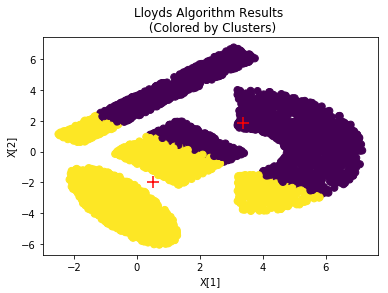

In [82]:
X = data_2         # The input matrix X
(Y, C, D) = kMeans(X,2)
print("Lloyd's algorithm completed")
print("Final Objective Function Value = ", D)
plotKMeans(X,Y,C)

In [17]:
# This function returns the adjacency matrix for the spectral clustering algorithm
def adjacencyMatrix(x):
    n = x.shape[0]
    a = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            a[i,j] = math.exp(-l2dist(x[i],x[j]))
    return a

In [85]:
def diagonalMatrix(a):
    n = a.shape[0]
    d = np.sum(a, axis = 0)
    return np.diagflat(d)

# Plot the results of the spectral clustering algorithm
def plotSpectral(x,y,c):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x[:,0],x[:,1],c=c,s=50)
    for i,j in y:
        ax.scatter(i,j,c='r',marker='D')
#     ax.set_xlabel('X[1]')
#     ax.set_ylabel('X[2]')
#     plt.title('Lloyds Algorithm Results \n (Colored by Clusters)')
    plt.savefig('spectral.svg',format='svg')
    plt.show()

Initialization  1  begins...
 Iteration:  0 , Cost =  1.4932485650888874
 Iteration:  1 , Cost =  1.1524086177037285
 Iteration:  2 , Cost =  1.1524086177037285
Initialization  2  begins...
 Iteration:  0 , Cost =  1.4722303033806947
 Iteration:  1 , Cost =  1.1524086177037285
 Iteration:  2 , Cost =  1.1524086177037285
Initialization  3  begins...
 Iteration:  0 , Cost =  2.4229148703493943
 Iteration:  1 , Cost =  1.1561381323886921
 Iteration:  2 , Cost =  1.1524086177037285
 Iteration:  3 , Cost =  1.1524086177037285
Initialization  4  begins...
 Iteration:  0 , Cost =  2.001888167257279
 Iteration:  1 , Cost =  1.2210664730350391
 Iteration:  2 , Cost =  1.1563619654403838
 Iteration:  3 , Cost =  1.1524086177037285
 Iteration:  4 , Cost =  1.1524086177037285
Initialization  5  begins...
 Iteration:  0 , Cost =  2.34561544768451
 Iteration:  1 , Cost =  1.2007259982067047
 Iteration:  2 , Cost =  1.1534548921046173
 Iteration:  3 , Cost =  1.1524086177037285
 Iteration:  4 , Cost 

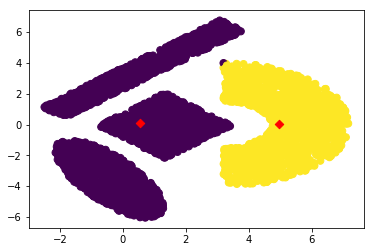

In [88]:
X = data_2
A = adjacencyMatrix(X)
D = diagonalMatrix(A)
L = D - A
N = X.shape[0]
k = 2
trash, U = np.asarray(eigh(L,eigvals = (1,k)))
# print(type(U))
# print(U)
(Y, C, D) = kMeans(U,k)
print("Spectral Clustering completed")
print("Final Objective Function Value = ", D)
Y = LloydRecomputeCentroids(X,C,np.zeros([k,2]),k) 
plotSpectral(X,Y,C)

In [50]:
dist = [1.9390825914260466, 1.1940101580463758, 1.4015756578612377]

In [51]:
K = [2, 4, 6]

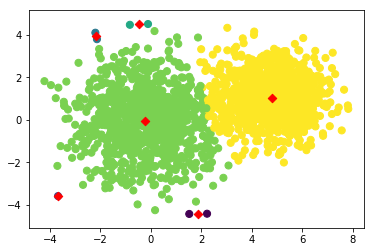

In [52]:
plotSpectral(X,Y,C)
plt.show()

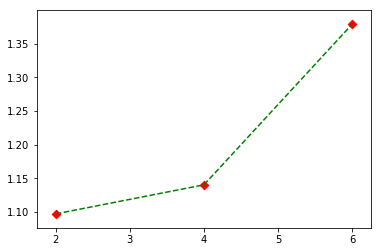

In [43]:
plt.plot(K, dist, 'g--')
plt.scatter(K, dist, c='r',marker="D")
plt.savefig("D_KK.svg", format='svg')
plt.show()

# greedyKCenters

In [57]:
# GreedyKCenters - This function finds the farthest point with respect to all the points in the set Q
def findFarthestPoint(x,q):
    maxDist = 0
    maxIndex = 0
    z = np.zeros(q.shape[1])
    for j in range(q.shape[0]):
        for i in range(x.shape[0]):
            d =  l2dist(x[i],q[j])
            if (d >= maxDist):
                maxDist = d
                maxIndex = i
    return maxIndex, x[[maxIndex]], maxDist

In [58]:
def greedyKcenter(x,q,k):
    objVals = []
    for i in range(k-1):
        indexToBeDeleted, rowTobeInserted, cost = findFarthestPoint(x,q)
        print('Iteration : ',i,' cost = ', cost)
        q = np.append(q, rowTobeInserted, axis=0)
        x = np.delete(x, indexToBeDeleted, axis = 0)
        objVals.append(cost)
    return q, objVals[-1]

In [68]:
# This function prints the results of the clustering in a 2-D Graph
def plotKGreedy(x,y,c):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(x[:,0],x[:,1],c=c,s=50)
    for i,j in y:
        ax.scatter(i,j,c='r',marker='D')
    plt.savefig('GreedyKcenters.svg',format='svg')
    plt.show()

Iteration :  0  cost =  96.17140978
Iteration :  1  cost =  169.7822205869
Iteration :  2  cost =  169.63960270240003
Algorithm Completed, Optimal Objective Value =  169.63960270240003
Q =  [[-1.7402  -1.7832 ]
 [ 3.0811   6.7565 ]
 [ 0.54923 -6.0252 ]
 [ 0.71578 -6.0515 ]]


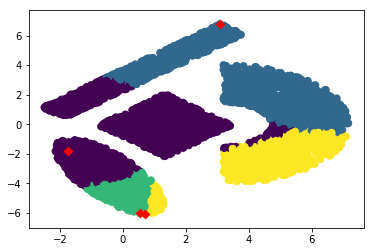

In [89]:
X= data_2
Q = np.ones([1,X.shape[1]])
nearestPoint = selectKRandom(X,1)
Q = np.append(Q, nearestPoint, axis=0)
Q = np.delete(Q,0,0)


Qfinal, D = greedyKcenter(X, Q, 4)
print("Algorithm Completed, Optimal Objective Value = ", D)
print("Q = ",Qfinal)
C = findNearestCentroids(X,Qfinal)
plotKGreedy(X,Qfinal,C)

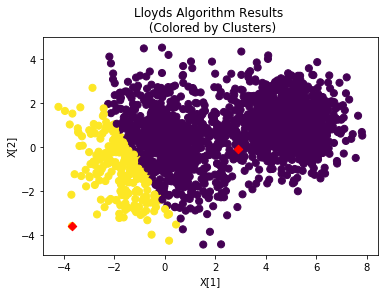